In [1]:
import torch

from arithmetic_lm.model import TransformerDecoder
from arithmetic_lm.tokenizer import CharTokenizer
from arithmetic_lm.interp import plot_attn_maps
from arithmetic_lm.constants import PLOTS_DIR

import warnings

warnings.filterwarnings("ignore")

/Users/imran/Desktop/studies/thesis/msc_thesis/arithmetic_lm/interp/attn_maps.py:127: SyntaxWarning: invalid escape sequence '\$'
  f"Attention maps for prompt: {repr(prompt_str).replace('$', '\$')}, pred: {repr(pred_answer_str).replace('$', '\$')} [{len(astr)}+{len(bstr)}]"
/Users/imran/Desktop/studies/thesis/msc_thesis/arithmetic_lm/interp/attn_maps.py:127: SyntaxWarning: invalid escape sequence '\$'
  f"Attention maps for prompt: {repr(prompt_str).replace('$', '\$')}, pred: {repr(pred_answer_str).replace('$', '\$')} [{len(astr)}+{len(bstr)}]"


In [2]:
tokenizer = CharTokenizer()

In [3]:
ckpt_path = "../checkpoints/addition-high-n-digit-variation/trans_dec_2layers_384embd_3head/step500000-train_loss1.9965-val_loss1.9776_backup.ckpt"

# load model
ckpt = torch.load(ckpt_path, map_location="mps")
model = TransformerDecoder(
    **ckpt["hyper_parameters"]["model_hparams"],
    # vocab_size=tokenizer.vocab_size,
)
# state dict has a prefix "model." in the key names
model.load_state_dict({k[6:]: v for k, v in ckpt["state_dict"].items()})
model.eval()

TransformerDecoder(
  (embedding): Embedding(100, 384)
  (pos_encoder): AbsolutePositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=384, out_features=384, bias=True)
        )
        (linear1): Linear(in_features=384, out_features=1536, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=1536, out_features=384, bias=True)
        (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=384, out_features=100, bias=False)

In [4]:
list(model.modules())

[TransformerDecoder(
   (embedding): Embedding(100, 384)
   (pos_encoder): AbsolutePositionalEncoding(
     (dropout): Dropout(p=0.1, inplace=False)
   )
   (transformer_encoder): TransformerEncoder(
     (layers): ModuleList(
       (0-1): 2 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=384, out_features=384, bias=True)
         )
         (linear1): Linear(in_features=384, out_features=1536, bias=True)
         (dropout): Dropout(p=0.1, inplace=False)
         (linear2): Linear(in_features=1536, out_features=384, bias=True)
         (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.1, inplace=False)
         (dropout2): Dropout(p=0.1, inplace=False)
       )
     )
     (norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
   )
   (lm_head): Linear(in_features=384, out_fe

In [5]:
module_names = [
    "transformer_encoder.layers[0].self_attn",
    "transformer_encoder.layers[1].self_attn",
]
figsize = (14, 8)

In [6]:
subdir = PLOTS_DIR / "exp_12"
subdir.mkdir(exist_ok=True)

prompt: '$123000456+789000123=' 9+9
true_ans: 912000579
pred_answer: 912000579$
transformer_encoder.layers[0].self_attn torch.Size([1, 3, 30, 30])
transformer_encoder.layers[1].self_attn torch.Size([1, 3, 30, 30])


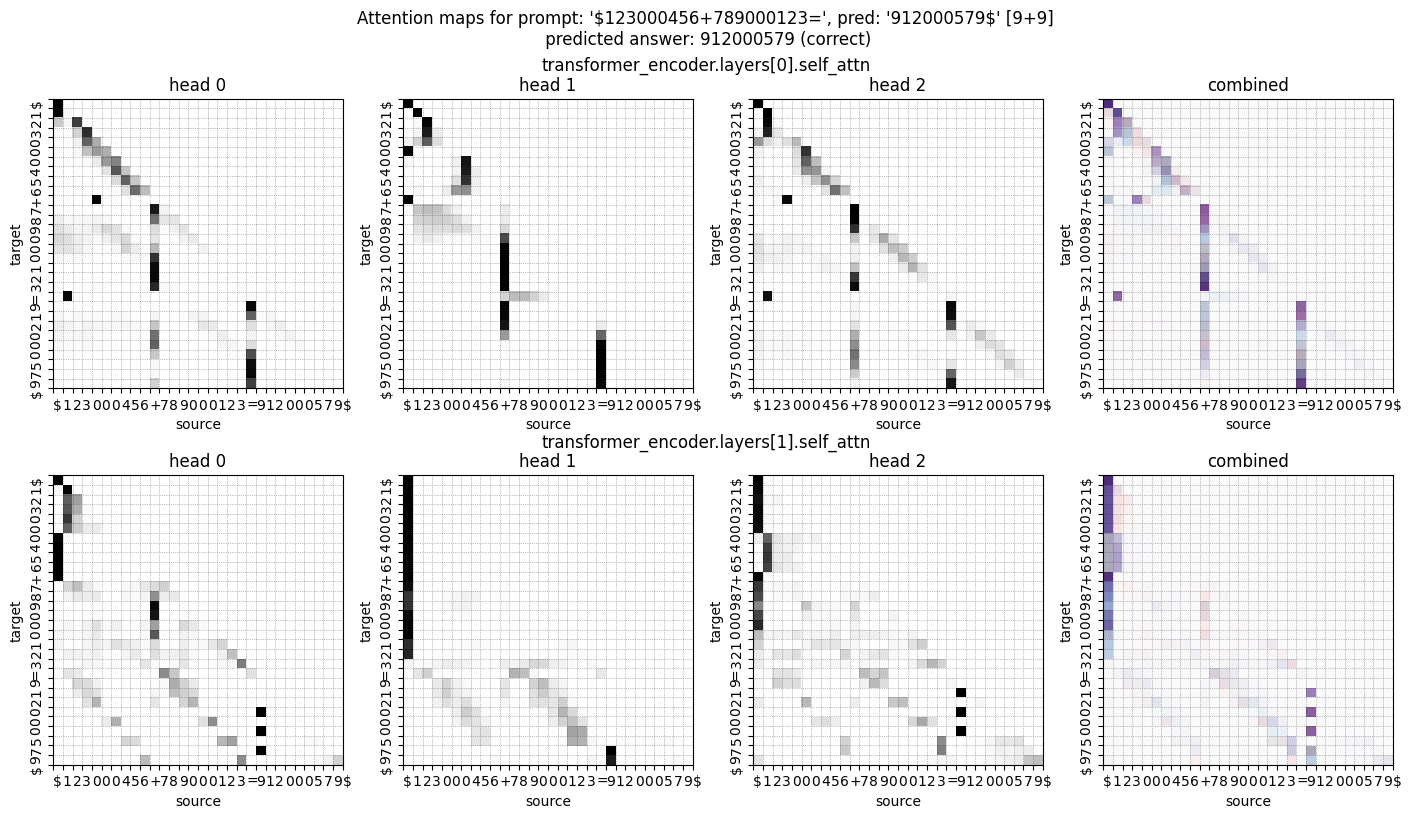

In [7]:
a, b = 123000456, 789000123
savepath = subdir / f"exp12_attention_maps_{a}+{b}.png"
plot_attn_maps(
    model=model,
    tokenizer=tokenizer,
    a=a,
    b=b,
    module_names=module_names,
    savepath=savepath,
    figsize=figsize,
    # save=True,
)

prompt: '$1111111111+2222222222=' 10+10
true_ans: 3333333333
pred_answer: 3333333333$
transformer_encoder.layers[0].self_attn torch.Size([1, 3, 33, 33])
transformer_encoder.layers[1].self_attn torch.Size([1, 3, 33, 33])


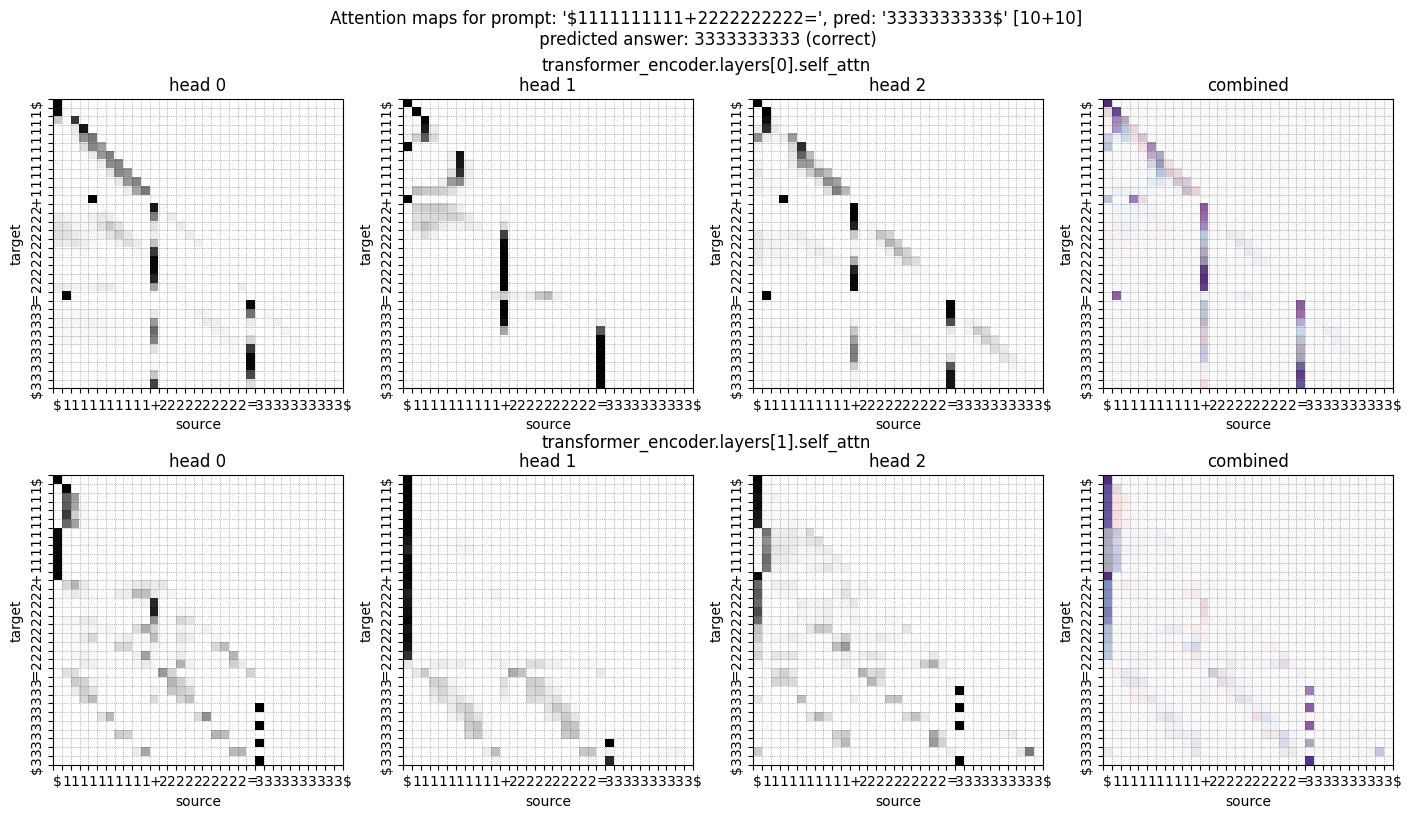

In [8]:
a, b = 1111111111, 2222222222
savepath = subdir / f"exp12_attention_maps_{a}+{b}.png"
plot_attn_maps(
    model=model,
    tokenizer=tokenizer,
    a=a,
    b=b,
    module_names=module_names,
    savepath=savepath,
    figsize=figsize,
    # save=True,
)